# Bari's schools dataset

In [32]:
import numpy as np
import pandas as pd

## Import, Select and Clean the data

In [33]:
df = pd.read_csv("Raw Datasets/Elenco_scuole_2023_2024.csv")

In [34]:
# Drop all the row with at least one na value
df.dropna(axis=0, inplace=True)

In [35]:
df.drop(['pec', 'plesso', 'dirigente', 'email', 'tel', 'fax', 'municipio', 'proprietario', 'n_refettori', 'n_segreteria', 
        'n_ambienti_destinati_al_dirigente_scolastico', 'n_archivio', 'n_sale_riunioni', 'n_locali_concessi_a_enti_in_orario_scolastico',
        'n_locali_concessi_a_enti_in_orario_extrascolastico',
        'n_locali_concessi_a_enti_in_orario_entrambi', 'ore_articolate_su_gg',
        'n_ore_a_tempo_normale', 'n_ore_a_tempo_prolungato',
        'n_ore_a_tempo_pieno', 'n_ore_serale', 'n_alunni_refezione',
        'n_alunni_refezione_tempo_pieno', 'n_alunni_rientro_settimanale', 'n_alunni_stranieri',
        'n_classi_alunni_stranieri', 'n_alunni_inadempienti', 'iscritti_f',
        'iscritti_m', 'frequentanti_f', 'frequentanti_m', 'n_mediatori_culturali', 'matricola_aqp'], 
        axis=1, inplace=True)

Format the address to match the Geopandas queries

In [36]:
df['indirizzo'] = df['indirizzo'] + ", Bari, Apulia, Italy"

In [37]:
address_list = df['indirizzo'].drop_duplicates().to_list()

In [38]:
# First 10 address in the list
address_list[0:10]

['VIA DELLA TOLLERANZA, Bari, Apulia, Italy',
 'VIA DALMAZIA, Bari, Apulia, Italy',
 'PIAZZETTA ELEONORA, Bari, Apulia, Italy',
 'VIA LUCCA, Bari, Apulia, Italy',
 'L.GO CARABELLESE 1 BARI, Bari, Apulia, Italy',
 'VIA GOBETTI 1, Bari, Apulia, Italy',
 'VIA LUIGI PINTO 1, Bari, Apulia, Italy',
 'VIA ZANARDELLI 16, Bari, Apulia, Italy',
 'VIA RE DAVID 179, Bari, Apulia, Italy',
 'CORSO ALCIDE DE GASPERI 345, Bari, Apulia, Italy']

## Schools Lat & long extraction

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

from geopy import Nominatim
from geopy.exc import GeocoderTimedOut

### Geocoding of the points

In [40]:
geocoder = Nominatim(user_agent='user_agent')
coordinate = {}
errors = []

for address in address_list:
    try:
        # print(address)
        coordinate[address] = geocoder.geocode(address)[1]
    except (GeocoderTimedOut, TypeError):
        errors.append(address)

In [41]:
# Address that does not have a lat&long
errors

['PIAZZALE PUGLIESE 1, Bari, Apulia, Italy',
 'via G. Tauro, Bari, Apulia, Italy',
 'Via Don Gnocchi snc, Bari, Apulia, Italy',
 'viale G. BARTOLO N.8, Bari, Apulia, Italy',
 'PIAZA GIULIO CESARE 11, Bari, Apulia, Italy',
 'VIA SUPPA N. 7, Bari, Apulia, Italy',
 'V.LE LEONARDO DEL TURCO, Bari, Apulia, Italy',
 'VIA CALDAROLA (POLIV.), Bari, Apulia, Italy',
 'CORSO DE GASPERI 307, Bari, Apulia, Italy',
 'Via R. Bovio 19/A, Bari, Apulia, Italy',
 'VIA CALDAROLA CENTRO STUDI POLIVALENTE BARI, Bari, Apulia, Italy',
 'piazzetta eleonore, Bari, Apulia, Italy',
 'Via C. Ulpiani n. 9, Bari, Apulia, Italy',
 'via laetitia abbaticola 2, Bari, Apulia, Italy',
 'via Nicola Costa 2 - 4, Bari, Apulia, Italy',
 'Via V. Veneto n. 189, Bari, Apulia, Italy',
 'TRAV.2^ VIA UMBRIA 5, Bari, Apulia, Italy',
 'Via Del Quadrifoglio 14, Bari, Apulia, Italy',
 'via F. Campione 27, Bari, Apulia, Italy',
 'Via dei Bersaglieri 11, Bari, Apulia, Italy',
 'VIA DEL FARO 8/A, Bari, Apulia, Italy']

In [45]:
handmade_coords = {
    "L.GO CARABELLESE 1 BARI, Bari, Apulia, Italy": (41.12072, 16.87869),
    "PIAZZALE PUGLIESE 1, Bari, Apulia, Italy": (41.09211, 16.89051),
    "via G. Tauro, Bari, Apulia, Italy": (41.09996, 16.86110),
    "Via Don Gnocchi snc, Bari, Apulia, Italy": (41.12991, 16.78562),
    "viale G. BARTOLO N.8, Bari, Apulia, Italy": (41.09384, 16.85765),
    "PIAZA GIULIO CESARE 11, Bari, Apulia, Italy": (41.11219, 16.86176),
    "V.LE LEONARDO DEL TURCO, Bari, Apulia, Italy": (41.15107, 16.75537),
    "VIA CALDAROLA (POLIV.), Bari, Apulia, Italy": (41.10245, 16.91040),
    "Via R. Bovio 19/A, Bari, Apulia, Italy": (41.12288, 16.85923),
    "VIA CALDAROLA CENTRO STUDI POLIVALENTE BARI, Bari, Apulia, Italy": (41.10614, 16.90050),
    "piazzetta eleonore, Bari, Apulia, Italy": (41.14846, 16.73927),
    "Via C. Ulpiani n. 9, Bari, Apulia, Italy": (41.11169, 16.87950),
    "via laetitia abbaticola 2, Bari, Apulia, Italy": (41.10047, 16.88706),
    "via Nicola Costa 2 - 4, Bari, Apulia, Italy": (41.13589, 16.81887),
    "Via V. Veneto n. 189, Bari, Apulia, Italy": (41.06827, 16.86963),
    "TRAV.2^ VIA UMBRIA 5, Bari, Apulia, Italy": (41.12171, 16.79384),
    "Via Del Quadrifoglio 14, Bari, Apulia, Italy": (41.15381, 16.76990),
    "via F. Campione 27, Bari, Apulia, Italy": (41.11289, 16.86545),
    "Corso Alcide De Gasperi 378, Bari, Apulia, Italy": (41.07993, 16.87203),
    "Via Giustino Fortunato 8/m, Bari, Apulia, Italy": (41.10451, 16.88094),
    "VIA SUPPA N. 7, Bari, Apulia, Italy": (41.119228, 16.867515),
    "Via Papa Giovanni XXIII N.55 - 70124  BARI, Bari, Apulia, Italy": (41.107169, 16.869964),
    "CORSO DE GASPERI 307, Bari, Apulia, Italy": (41.106477, 16.871666),
    "Strada San Giacomo 2, Bari, Apulia, Italy": (41.127982, 16.868007),
    "VIA DEL FARO 8/A, Bari, Apulia, Italy": (41.137719, 16.844382),
    "Via Giulio Petroni 90, Bari, Apulia, Italy": (41.106222, 16.867659),
    "VIA RAVANAS 1, Bari, Apulia, Italy": (41.127539, 16.858227),
    "via Timavo 25, Bari, Apulia, Italy": (41.109722, 16.865918),
    "Via dei Bersaglieri 11, Bari, Apulia, Italy": (41.116875, 16.884277)
}

On each different execution of the notebook the localization library fails on different addresses, checks on each execution if a new address should be inserted into the error set

In [ ]:
# # DEBUG AREA: this peace of code print the address that don't have a lat&long
# for e in errors:
#     if e not in handmade_coords:
#         print(e)

Add schools coordinates

In [50]:
df['Lat'] = df['indirizzo'].map(lambda x: coordinate[x][0] if x in coordinate.keys() else handmade_coords[x][0])
df['Lon'] = df['indirizzo'].map(lambda x: coordinate[x][1] if x in coordinate.keys() else handmade_coords[x][1])

In [51]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Lon'], df['Lat']), crs="EPSG:4326"
)

<Axes: >

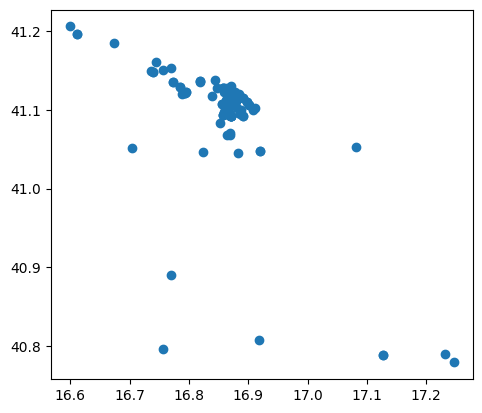

In [52]:
gdf.plot()

## Mapping geometry
Mapping the geometry of the districts at every point they contain

In [53]:
quartieri_sf = gpd.read_file("Raw Datasets/Quartieri_Bari/Quartieri.shp")

In [56]:
quartieri_sf

AttributeError: 'NoneType' object has no attribute 'copy'

,id2,objectid,id,nome,pchiave,geometry
0,1,1.0,1.0,I - SAN NICOLA,1,"POLYGON ((656605.013 4556283.531, 656605.013 4..."
1,2,1.0,1.0,I - SAN NICOLA,2,"POLYGON ((656604.56 4556287.124, 656605.013 45..."
2,3,2.0,0.0,II - MURAT,3,"POLYGON ((656305.109 4555256.891, 656306.453 4..."
3,4,2.0,0.0,II - MURAT,4,"POLYGON ((657402.219 4554558.297, 657400.422 4..."
4,5,3.0,0.0,III - MADONNELLA,5,"POLYGON ((657620.375 4554131.125, 657625.375 4..."
5,6,4.0,0.0,IV - LIBERTA',6,"POLYGON ((656290.016 4553446.094, 656271.984 4..."
6,7,5.0,0.0,V - JAPIGIA,7,"POLYGON ((658721.016 4553663.719, 658722.812 4..."
7,8,7.0,0.0,XVII - TORRE A MARE,8,"POLYGON ((668675.906 4550221.656, 668677.031 4..."
8,9,7.0,0.0,XVII - TORRE A MARE,9,"POLYGON ((668675.906 4550221.656, 668674.781 4..."
9,10,7.0,0.0,XVII - TORRE A MARE,10,"POLYGON ((669327.422 4550143.484, 669328.547 4..."


In [57]:
# Set the crs
quartieri_sf.to_crs(4326, inplace=True)

Show the districts on the map

<Axes: >

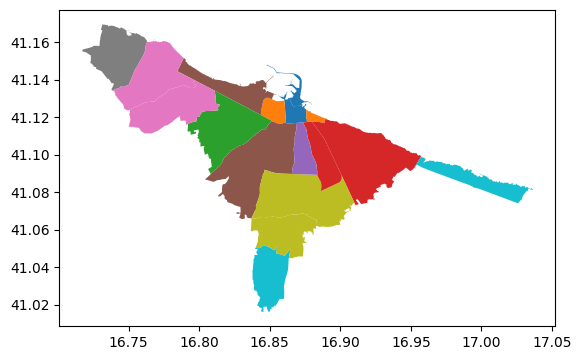

In [58]:
quartieri_sf.plot(column='nome')

In [59]:
# List of districts that contain the points
lst = []
# District geometries
qs = quartieri_sf['geometry']

for i, p in enumerate(gdf['geometry']):

    quartieri_contains_pt = quartieri_sf[qs.contains(p)]['nome'].to_list()
    # If there is at least a district that contains the point p, take first
    if len(quartieri_contains_pt) != 0:
        lst.append(quartieri_contains_pt[0])
    else:
        lst.append(pd.NA)

In [60]:
# First 10 element of the list
lst[0:10]

['XIII - SANTO SPIRITO',
 'III - MADONNELLA',
 'XIII - SANTO SPIRITO',
 'XIII - SANTO SPIRITO',
 'III - MADONNELLA',
 'III - MADONNELLA',
 'III - MADONNELLA',
 <NA>,
 'VII - CARRASSI',
 <NA>]

In [61]:
gdf['quartiere'] = lst

In [62]:
gdf.dropna(inplace=True)

In [63]:
# Drop the point's geometry
gdf.drop(columns='geometry', inplace=True)

In [64]:
# Assign the district's geometry to each point
gdf['quartiere_geom'] = gdf['quartiere'].map(lambda x: quartieri_sf[quartieri_sf['nome'] == x]['geometry'])

In [65]:
gdf.head()

,nome,ordine,indirizzo,n_biblioteca,n_laboratori,n_aule_attivita_collettive,n_palestre_coperte,n_palestre_scoperte,n_auditorium,n_ambienti_destinati_ad_aule,...,n_alunni_servizio_trasporto,iscritti_tot,frequentanti_tot,n_docenti,n_bidelli,n_custode,Lat,Lon,quartiere,quartiere_geom
1,ARISTIDE GABELLI (Istituto Comprensivo),Infanzia,"VIA DELLA TOLLERANZA, Bari, Apulia, Italy",0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,40.0,40.0,3.0,1.0,0.0,41.149196,16.735655,XIII - SANTO SPIRITO,"12 POLYGON ((16.73178 41.16969, 16.7318 41...."
2,ARISTIDE GABELLI (Istituto Comprensivo),Infanzia,"VIA DALMAZIA, Bari, Apulia, Italy",0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,15.0,62.0,62.0,10.0,2.0,0.0,41.120078,16.883716,III - MADONNELLA,"4 POLYGON ((16.87762 41.12319, 16.87768 41...."
5,ARISTIDE GABELLI (Istituto Comprensivo),Primaria,"PIAZZETTA ELEONORA, Bari, Apulia, Italy",1.0,1.0,2.0,1.0,1.0,1.0,10.0,...,14.0,81.0,81.0,17.0,1.0,0.0,41.148046,16.739179,XIII - SANTO SPIRITO,"12 POLYGON ((16.73178 41.16969, 16.7318 41...."
6,ARISTIDE GABELLI (Istituto Comprensivo),Primaria,"VIA LUCCA, Bari, Apulia, Italy",1.0,1.0,0.0,1.0,1.0,1.0,26.0,...,170.0,359.0,359.0,56.0,6.0,1.0,41.161646,16.744198,XIII - SANTO SPIRITO,"12 POLYGON ((16.73178 41.16969, 16.7318 41...."
9,BALILLA - IMBRIANI (Istituto Comprensivo),Infanzia,"L.GO CARABELLESE 1 BARI, Bari, Apulia, Italy",1.0,2.0,0.0,0.0,0.0,0.0,9.0,...,0.0,164.0,164.0,15.0,3.0,0.0,41.120362,16.879270,III - MADONNELLA,"4 POLYGON ((16.87762 41.12319, 16.87768 41...."


In [67]:
gdf['rapporto'] = gdf['frequentanti_tot'] / gdf['n_docenti']

#### Note
Is possible to find too much frequentant students for a few teachers.  
Example:

In [219]:
gdf.loc[gdf['nome'] == 'JAPIGIA 1 - VERGA (Istituto Comprensivo)',
         ['nome', 'ordine', 'indirizzo', 'frequentanti_tot', 'n_docenti', 'rapporto']]

,nome,ordine,indirizzo,frequentanti_tot,n_docenti,rapporto
90,JAPIGIA 1 - VERGA (Istituto Comprensivo),Infanzia,"V.LE JAPIGIA 140 , Bari, Apulia, Italy",96.0,11.0,8.727273
91,JAPIGIA 1 - VERGA (Istituto Comprensivo),Primaria,"V.LE JAPIGIA 140 , Bari, Apulia, Italy",258.0,48.0,5.375000
93,JAPIGIA 1 - VERGA (Istituto Comprensivo),Infanzia,"VIA PEUCETIA , Bari, Apulia, Italy",85.0,9.0,9.444444
94,JAPIGIA 1 - VERGA (Istituto Comprensivo),Primaria,"VIA PEUCETIA , Bari, Apulia, Italy",321.0,1.0,321.000000


## View
Below is an area for each Tableau representation (or other Softwares)

### Bouble Chart ~ Tableau

This area only changes the **sep** char of the csv file because Tableau works with "\t" sep

In [ ]:
gdf.to_csv("./Tableau/School - Bubble chart/modified_schools.csv", index=False, sep='\t')

### Radar Chart ~ Fluorish

In [330]:
df_radar = gdf.copy()

In [204]:
df_radar.columns

Index(['nome', 'ordine', 'indirizzo', 'n_biblioteca', 'n_laboratori',
       'n_aule_attivita_collettive', 'n_palestre_coperte',
       'n_palestre_scoperte', 'n_auditorium', 'n_ambienti_destinati_ad_aule',
       'n_sale_insegnati', 'n_cucine', 'n_servizi_igenici', 'n_ascensori',
       'n_piani', 'n_aule_non_utilizzate', 'n_classi_funzionanti_nell_anno',
       'n_alunni_servizio_trasporto', 'iscritti_tot', 'frequentanti_tot',
       'n_docenti', 'n_bidelli', 'n_custode', 'Lat', 'Lon', 'quartiere',
       'quartiere_geom', 'rapporto'],
      dtype='object')

Select useful columns

In [331]:
# Select only some columns
df_radar = df_radar.loc[:, ['ordine','n_biblioteca', 'n_laboratori', 'n_palestre_coperte', 'n_palestre_scoperte',
                             'n_cucine', 'n_ascensori', 'n_servizi_igenici',
                             'n_ambienti_destinati_ad_aule', 'n_classi_funzionanti_nell_anno', 'frequentanti_tot']]

In [332]:
df_radar.head()

,ordine,n_biblioteca,n_laboratori,n_palestre_coperte,n_palestre_scoperte,n_cucine,n_ascensori,n_servizi_igenici,n_ambienti_destinati_ad_aule,n_classi_funzionanti_nell_anno,frequentanti_tot
1,Infanzia,0.0,0.0,0.0,0.0,2.0,0.0,11.0,3.0,3,40.0
2,Infanzia,0.0,0.0,0.0,0.0,1.0,0.0,6.0,5.0,3,62.0
5,Primaria,1.0,1.0,1.0,1.0,1.0,1.0,17.0,10.0,5,81.0
6,Primaria,1.0,1.0,1.0,1.0,1.0,1.0,28.0,26.0,20,359.0
9,Infanzia,1.0,2.0,0.0,0.0,0.0,0.0,3.0,9.0,9,164.0


Transform column values ​​from string to int

In [333]:
df_radar['n_classi_funzionanti_nell_anno'] = df_radar.loc[:, ['n_classi_funzionanti_nell_anno']].map(lambda s: int(s.split(" ")[0]))

Group rows by school order

In [334]:
df_radar = df_radar.groupby("ordine").mean().reset_index()

Round the aggregate values

In [335]:
df_radar.loc[:, 'n_biblioteca':] = df_radar.loc[:, 'n_biblioteca':].map(lambda x: np.ceil(x).astype(int))

Rename columns with understandable names

In [336]:
df_radar.columns = ['ordine', 'biblioteche', 'laboratori', 'palestre_coperte',
                    'palestre_scoperte', 'cucine', 'ascensori',
                    'servizi_igenici','aule',  'aule_funzionanti_nell_anno', 'media_studenti']

In [337]:
df_radar

,ordine,biblioteche,laboratori,palestre_coperte,palestre_scoperte,cucine,ascensori,servizi_igenici,aule,aule_funzionanti_nell_anno,media_studenti
0,Asilo,1.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,42.0
1,Infanzia,1.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,4.0,86.0
2,Primaria,1.0,2.0,1.0,1.0,1.0,1.0,11.0,13.0,13.0,267.0
3,Secondaria I Grado,1.0,3.0,1.0,1.0,1.0,1.0,6.0,8.0,10.0,211.0
4,Secondaria II Grado,1.0,7.0,1.0,1.0,1.0,2.0,23.0,27.0,27.0,564.0


Save new Dataset

In [338]:
df_radar.to_csv("Fluorish\Schools - Radar chart\modified_schools_radarChart.csv", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\gabry\AppData\Local\Temp\ipykernel_23588\3364606127.py:1: SyntaxWarning: invalid escape sequence '\S'
  df_radar.to_csv("Fluorish\Schools - Radar chart\modified_schools_radarChart.csv", index=False)


## Stacked Bar chart ~ Tableau

**Fondamentals of data vis**: Capitolo 10 sez. 10.3

Select useful columns

In [368]:
df_column_chart = gdf.loc[:, ['quartiere', 'iscritti_tot', 'frequentanti_tot']].copy()

Group rows by school district

In [369]:
df_column_chart = df_column_chart.groupby("quartiere").sum().reset_index()

In [370]:
# Calculate the number of non-attending students
df_column_chart["non_frequentanti"] = df_column_chart["iscritti_tot"]-df_column_chart["frequentanti_tot"]

In [371]:
df_column_chart

,quartiere,iscritti_tot,frequentanti_tot,non_frequentanti
0,I - SAN NICOLA,486.0,486.0,0.0
1,II - MURAT,1442.0,1436.0,6.0
2,III - MADONNELLA,1228.0,1223.0,5.0
3,IV - LIBERTA',2438.0,2403.0,35.0
4,IX - STANIC,42.0,42.0,0.0
5,V - JAPIGIA,3474.0,3474.0,0.0
6,VI - SAN PASQUALE,2682.0,2682.0,0.0
7,VII - CARRASSI,1359.0,1334.0,25.0
8,VIII - PICONE,6246.0,6152.0,94.0
9,X - MARCONI - SAN GIROLAMO - FESCA,468.0,468.0,0.0


In [ ]:
df_column_chart.to_csv("Tableau\School - Stacked Bar chart\modified_schools_column_chart.csv", index=False)

## Pyramid chart - gender

In [240]:
# TODO:

In [ ]:
df = pd.read_csv("Raw Datasets/Elenco_scuole_2023_2024.csv")